<a href="https://colab.research.google.com/github/Duduz1nh00/TC/blob/main/TC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

Nessa análise foram utilizadas algumas das principais bibliotecas:

*pandas*: Para manipulação e análise eficiente de dados. <br/>
*numpy*: Para operações matemáticas e manipulação de arrays numéricos.<br/>
*seaborn* e *matplotlib*: Para visualização e criação de gráficos estatísticos.<br/>
*scikit-learn*: Para pré-processamento, construção, treinamento e avaliação de modelos de aprendizado de máquina.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

**Carregando DataSet**

In [ ]:
df = pd.read_csv("insurance.csv")

# Exploração de dados

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()

**Normalização dos dados**

Neste script, realizamos a normalização e preparação dos dados para análise. A normalização é uma etapa essencial ao trabalhar com dados categóricos e numéricos, pois facilita a análise e a modelagem dos dados.




In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

**Matriz de correlação**

Após a normalização dos dados, é possível visualizar as relações entre as diferentes variáveis utilizando uma matriz de correlação. A matriz de correlação é uma ferramenta estatística que mede a força e a direção da relação linear entre variáveis numéricas.


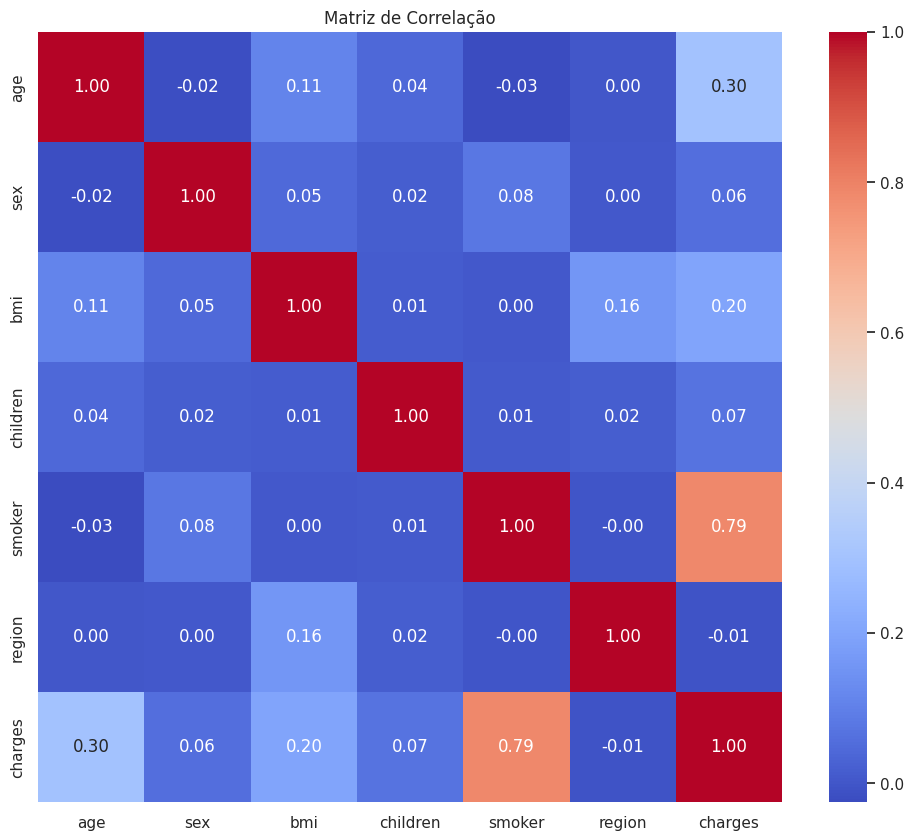

In [ ]:
# Remover espaços em branco extras nas colunas
df.columns = df.columns.str.strip()

# Calcular a correlação entre variáveis numéricas
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

**Grafico Fumantes x não fumantes por sexo**

Criado grafico para melhor visualização grafica de fumantes para não fumantes de acordo com os dados de coorelação obtidos na Matrix.



Text(0.5, 1.0, 'O numero de fumantes e não fumantes separados por sexo (Maior de 18 anos)')

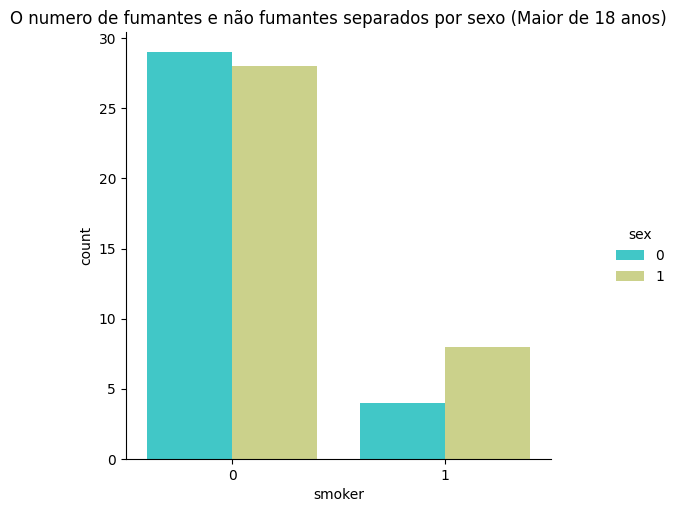

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("O numero de fumantes e não fumantes separados por sexo (Maior de 18 anos)")

**Treinando e Avaliando Modelos de Regressão**

Neste bloco de código, vamos começar separando as features (x) e o target (y), e depois dividimos os dados em treino e teste. A seguir, vamos treinar vários modelos de regressão, como Regressão Linear, Floresta Aleatória, Árvore de Decisão, Gradient Boosting, KNN, e SVR.

Para cada modelo, vamos avaliar o desempenho usando o
𝑅², MSE (Erro Quadrático Médio), e MAE (Erro Absoluto Médio), tanto no treino quanto no teste. Isso vai ajudar a identificar qual modelo funciona melhor para prever a variável charges.

In [ ]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('LR: ' , lr.score(x_test,y_test))

# df['region']= label_encoder.fit_transform(df['region'])
X = df.drop(['charges','region'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
print('Poly: ', plr.score(X_test,Y_test))

LR:  0.7833463107364539
Poly:  0.8849197344147233


# Valores reais x previsto

Este código realiza uma análise de regressão polinomial para prever a variável charges. Ele começa preparando os dados ao remover a coluna charges e a coluna region do DataFrame e criando características polinomiais de segundo grau. Em seguida, divide os dados em conjuntos de treino e teste e treina um modelo de regressão linear usando essas características polinomiais

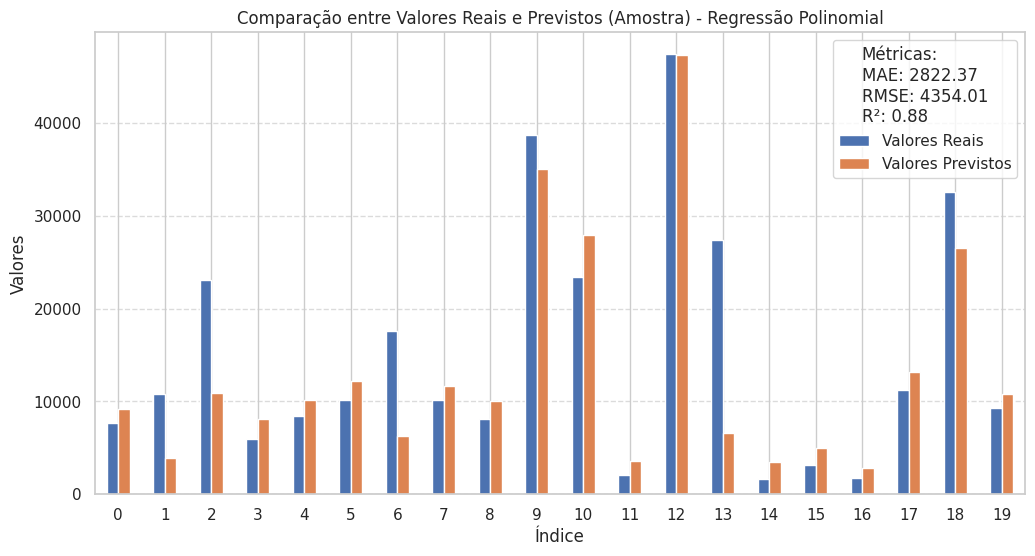

In [134]:
# Preparação dos dados para regressão polinomial
X = df.drop(['charges', 'region'], axis=1)
y = df['charges']

# Criação de características polinomiais
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state=0)

# Treinamento do modelo de regressão polinomial
plr = LinearRegression().fit(X_train, y_train)

# Fazer previsões
y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

# Cálculo de métricas
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Criar um DataFrame para comparação
df_comparacao = pd.DataFrame({'Valores Reais': y_test, 'Valores Previstos': y_test_pred})

# Selecionar um subconjunto para o gráfico de barras
df_sample = df_comparacao.sample(n=20, random_state=42).reset_index(drop=True)

# Gráfico de barras
plt.figure(figsize=(12, 6))
df_sample.plot(kind='bar', ax=plt.gca())
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Comparação entre Valores Reais e Previstos (Amostra) - Regressão Polinomial')
plt.xticks(rotation=0)
plt.legend(['Valores Reais', 'Valores Previstos'], title=f'Métricas:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()